In [1]:
import math
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import mesa_reader as mr
import os
from os.path import exists


In [2]:
MS_to_MJ = 1048
RS_to_RJ = 9.7
mas_names=['3','5','7','10','12']
mas=[3,5,7,10,12]
fenv_names=['0.1','0.01']

In [3]:
# do it the first time
#for i in mas_names:
#    os.rename('LOGS/history_1e_evolve_'+i+'ME_0.1_9.0', 'LOGS/history_1e_evolve_'+i+'ME_0.1_9.0.data')
#    os.rename('LOGS/history_1e_evolve_'+i+'ME_0.01_9.0', 'LOGS/history_1e_evolve_'+i+'ME_0.01_9.0.data')

#os.mkdir('results')

In [4]:
names=[]
for i in mas_names:
    name1 = 'm'+i+'f01'
    name2 = 'm'+i+'f001'
    locals()[name1] = mr.MesaData('LOGS/history_1e_evolve_'+i+'ME_0.1_9.0.data')
    locals()[name2] = mr.MesaData('LOGS/history_1e_evolve_'+i+'ME_0.01_9.0.data')
    names.append(name1)
    names.append(name2)
    


In [5]:
prfl_names=[]
for i in mas_names:
    for j in fenv_names:
        lis=[]
        for k in range(100):
            nam='LOGS/profile_'+i+'ME_'+j+'_9.0_'+str(k)+'.data'
            if exists(nam):
                lis.append(k)
            
            
        last_profile='LOGS/profile_'+i+'ME_'+j+'_9.0_'+str(lis[-1])+'.data'
        prfl_names.append('prfl_m'+i+'f0'+j.split('.')[-1])
        locals()['prfl_m'+i+'f0'+j.split('.')[-1]] = mr.MesaData(last_profile)

In [6]:
for i in names:
    locals()['age_'+i]=locals()[i].star_age
    locals()['r_'+i]=locals()[i].radius* RS_to_RJ 
    locals()['m_'+i]=locals()[i].star_mass* MS_to_MJ
    
    



In [7]:
catalog=pd.read_csv('catalog.csv')
M_R_name=catalog[['mass','radius','# name']]
M_R_name=M_R_name.dropna()


In [8]:
table_data=M_R_name.loc[[1360,4548,1335,2997,1581,2887,4494,1551,561,1369]]
table_data

,mass,radius,# name
1360,0.01000,0.14300,K2-133 c
4548,0.00947,0.22946,TOI-178 d
1335,0.01664,0.16200,K2-111 b
2997,0.01611,0.24800,Kepler-26 b
1581,0.02140,0.18700,K2-286 b
2887,0.02328,0.26700,Kepler-223 b
4494,0.03200,0.20198,TOI-1062 b
1551,0.03550,0.29400,K2-266 b
561,0.03964,0.21800,HD 106315 b
1369,0.04090,0.29400,K2-138 e


In [9]:
table_data.to_latex(index=False)

/tmp/ipykernel_13101/3177414153.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_data.to_latex(index=False)


'\\begin{tabular}{rrl}\n\\toprule\n   mass &  radius &       \\# name \\\\\n\\midrule\n0.01000 & 0.14300 &     K2-133 c \\\\\n0.00947 & 0.22946 &    TOI-178 d \\\\\n0.01664 & 0.16200 &     K2-111 b \\\\\n0.01611 & 0.24800 &  Kepler-26 b \\\\\n0.02140 & 0.18700 &     K2-286 b \\\\\n0.02328 & 0.26700 & Kepler-223 b \\\\\n0.03200 & 0.20198 &   TOI-1062 b \\\\\n0.03550 & 0.29400 &     K2-266 b \\\\\n0.03964 & 0.21800 &  HD 106315 b \\\\\n0.04090 & 0.29400 &     K2-138 e \\\\\n\\bottomrule\n\\end{tabular}\n'

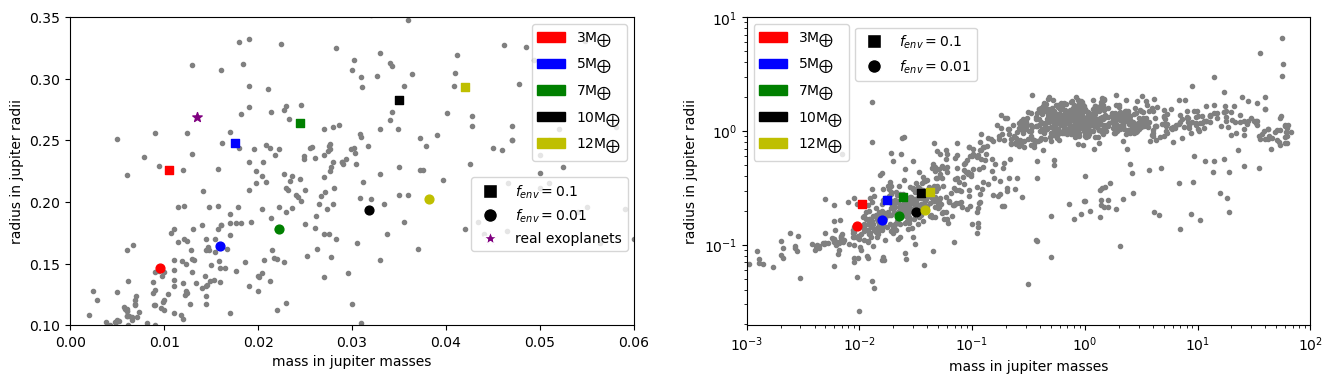

In [10]:
fig1, (ax1,ax2)=plt.subplots(1,2,figsize=[16,4])

ax1.set_xlabel('mass in jupiter masses')
ax1.set_ylabel('radius in jupiter radii')
ax1.scatter(M_R_name['mass'],M_R_name['radius'], color='gray', marker='.')
#ax1.scatter(M_R_name['mass'][1362],M_R_name['radius'][1362], color='purple', marker='*',s=50)
#ax1.scatter(M_R_name['mass'][4547],M_R_name['radius'][4547], color='purple', marker='*',s=50)
#ax1.scatter(M_R_name['mass'][1337],M_R_name['radius'][1337], color='purple', marker='*',s=50)
#ax1.scatter(M_R_name['mass'][2992],M_R_name['radius'][2992], color='purple', marker='*',s=50)
#ax1.scatter(M_R_name['mass'][1582],M_R_name['radius'][1582], color='purple', marker='*',s=50)
#ax1.scatter(M_R_name['mass'][2882],M_R_name['radius'][2882], color='purple', marker='*',s=50)
#ax1.scatter(M_R_name['mass'][4493],M_R_name['radius'][4493], color='purple', marker='*',s=50)
#ax1.scatter(M_R_name['mass'][1552],M_R_name['radius'][1552], color='purple', marker='*',s=50)
ax1.scatter(M_R_name['mass'][562],M_R_name['radius'][562], color='purple', marker='*',s=50)
ax1.scatter(M_R_name['mass'][1371],M_R_name['radius'][1371], color='purple', marker='*',s=50)



ax1.scatter(locals()['m_'+names[0]][-1],locals()['r_'+names[0]][-1],color='r',marker='s',s=40,label=r'3M$_\bigoplus$')
ax1.scatter(locals()['m_'+names[1]][-1],locals()['r_'+names[1]][-1],color='r',marker='o',s=40)
ax1.scatter(locals()['m_'+names[2]][-1],locals()['r_'+names[2]][-1],color='b',marker='s',s=40,label=r'5M$_\bigoplus$')
ax1.scatter(locals()['m_'+names[3]][-1],locals()['r_'+names[3]][-1],color='b',marker='o',s=40)
ax1.scatter(locals()['m_'+names[4]][-1],locals()['r_'+names[4]][-1],color='g',marker='s',s=40,label=r'7M$_\bigoplus$')
ax1.scatter(locals()['m_'+names[5]][-1],locals()['r_'+names[5]][-1],color='g',marker='o',s=40)
ax1.scatter(locals()['m_'+names[6]][-1],locals()['r_'+names[6]][-1],color='black',marker='s',s=40,label=r'10M$_\bigoplus$')
ax1.scatter(locals()['m_'+names[7]][-1],locals()['r_'+names[7]][-1],color='black',marker='o',s=40)
ax1.scatter(locals()['m_'+names[8]][-1],locals()['r_'+names[8]][-1],color='y',marker='s',s=40,label=r'12M$_\bigoplus$')
ax1.scatter(locals()['m_'+names[9]][-1],locals()['r_'+names[9]][-1],color='y',marker='o',s=40)



red_patch = mpatches.Patch(color='r', label=r'3M$_\bigoplus$')
blue_patch = mpatches.Patch(color='b', label=r'5M$_\bigoplus$')
green_patch = mpatches.Patch(color='g', label=r'7M$_\bigoplus$')
black_patch = mpatches.Patch(color='black', label=r'10M$_\bigoplus$')
yellow_patch = mpatches.Patch(color='y', label=r'12M$_\bigoplus$')



legend1=ax1.legend(handles=[red_patch,blue_patch,green_patch,black_patch,yellow_patch],loc='upper right')
ax1.add_artist(legend1)


legend_elements = [Line2D([0], [0], marker='s', color='w', label=r'$f_{env}=0.1$', markerfacecolor='black', markersize=10)
                   ,Line2D([0],[0],marker='o',color='w',label=r'$f_{env}=0.01$',markerfacecolor='black',markersize=10)
                  ,Line2D([0],[0],marker='*',color='w',label=r'real exoplanets',markerfacecolor='purple',markersize=10)]
ax1.legend(handles=legend_elements,loc='center',bbox_to_anchor=(.85,.36))
ax1.set_xlim(0,.06)
ax1.set_ylim(0.1,0.35)


ax2.set_xlabel('mass in jupiter masses')
ax2.set_ylabel('radius in jupiter radii')

ax2.scatter(M_R_name['mass'],M_R_name['radius'], color='gray', marker='.')
ax2.set_yscale('log')
ax2.set_xscale('log')

ax2.scatter(locals()['m_'+names[0]][-1],locals()['r_'+names[0]][-1],color='r',marker='s',s=40,label=r'3M$_\bigoplus$')
ax2.scatter(locals()['m_'+names[1]][-1],locals()['r_'+names[1]][-1],color='r',marker='o',s=40)
ax2.scatter(locals()['m_'+names[2]][-1],locals()['r_'+names[2]][-1],color='b',marker='s',s=40,label=r'5M$_\bigoplus$')
ax2.scatter(locals()['m_'+names[3]][-1],locals()['r_'+names[3]][-1],color='b',marker='o',s=40)
ax2.scatter(locals()['m_'+names[4]][-1],locals()['r_'+names[4]][-1],color='g',marker='s',s=40,label=r'7M$_\bigoplus$')
ax2.scatter(locals()['m_'+names[5]][-1],locals()['r_'+names[5]][-1],color='g',marker='o',s=40)
ax2.scatter(locals()['m_'+names[6]][-1],locals()['r_'+names[6]][-1],color='black',marker='s',s=40,label=r'10M$_\bigoplus$')
ax2.scatter(locals()['m_'+names[7]][-1],locals()['r_'+names[7]][-1],color='black',marker='o',s=40)
ax2.scatter(locals()['m_'+names[8]][-1],locals()['r_'+names[8]][-1],color='y',marker='s',s=40,label=r'12M$_\bigoplus$')
ax2.scatter(locals()['m_'+names[9]][-1],locals()['r_'+names[9]][-1],color='y',marker='o',s=40)



red_patch = mpatches.Patch(color='r', label=r'3M$_\bigoplus$')
blue_patch = mpatches.Patch(color='b', label=r'5M$_\bigoplus$')
green_patch = mpatches.Patch(color='g', label=r'7M$_\bigoplus$')
black_patch = mpatches.Patch(color='black', label=r'10M$_\bigoplus$')
yellow_patch = mpatches.Patch(color='y', label=r'12M$_\bigoplus$')

legend1=ax2.legend(handles=[red_patch,blue_patch,green_patch,black_patch,yellow_patch])
ax2.add_artist(legend1)


legend_elements = [Line2D([0], [0], marker='s', color='w', label=r'$f_{env}=0.1$', markerfacecolor='black', markersize=10)
                   ,Line2D([0],[0],marker='o',color='w',label=r'$f_{env}=0.01$',markerfacecolor='black',markersize=10)]
ax2.legend(handles=legend_elements,loc='center',bbox_to_anchor=(.30,.88))
ax2.set_xlim(1e-3,1e2)
ax2.set_yticks([1e-1,1e0,1e1])
#ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.savefig('results/M-R.pdf')
plt.show()

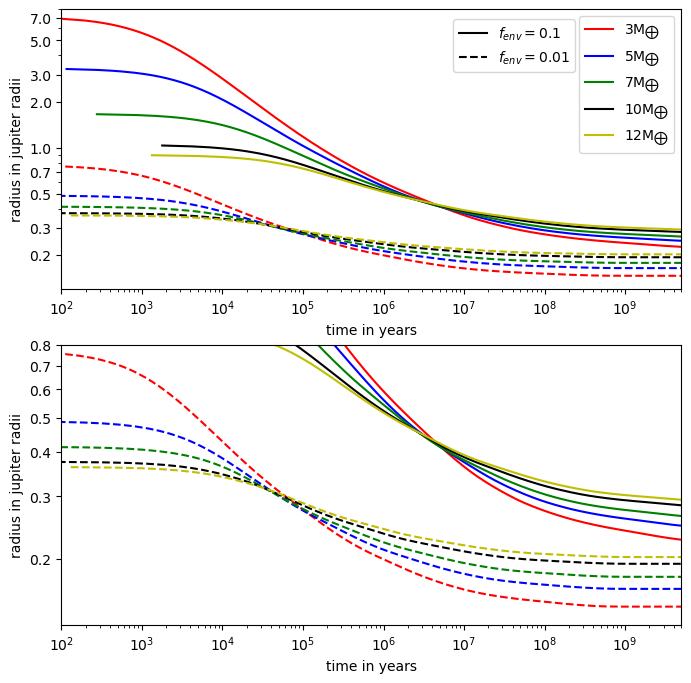

In [11]:
fig3, (ax1,ax2)=plt.subplots(2,figsize=[8,8])
ax1.plot(locals()['age_'+names[0]],locals()['r_'+names[0]],color='r',label=r'3M$_\bigoplus$')
ax1.plot(locals()['age_'+names[2]],locals()['r_'+names[2]],color='b',label=r'5M$_\bigoplus$')
ax1.plot(locals()['age_'+names[4]],locals()['r_'+names[4]],color='g',label=r'7M$_\bigoplus$')
ax1.plot(locals()['age_'+names[6]],locals()['r_'+names[6]],color='black',label=r'10M$_\bigoplus$')
ax1.plot(locals()['age_'+names[8]],locals()['r_'+names[8]],color='y',label=r'12M$_\bigoplus$')
ax1.plot(locals()['age_'+names[1]],locals()['r_'+names[1]],color='r',linestyle='--')
ax1.plot(locals()['age_'+names[3]],locals()['r_'+names[3]],color='b',linestyle='--')
ax1.plot(locals()['age_'+names[5]],locals()['r_'+names[5]],color='g',linestyle='--')
ax1.plot(locals()['age_'+names[7]],locals()['r_'+names[7]],color='black',linestyle='--')
ax1.plot(locals()['age_'+names[9]],locals()['r_'+names[9]],color='y',linestyle='--')
ax1.set_xlabel('time in years')
ax1.set_ylabel('radius in jupiter radii')
ax1.set_ylim(.12,8)
ax1.set_xlim(1e2,5e9)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_yticks([.2,.3,.5,.7,1,2,3,5,7])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.legend()

ax2.plot(locals()['age_'+names[0]],locals()['r_'+names[0]],color='r')
ax2.plot(locals()['age_'+names[2]],locals()['r_'+names[2]],color='b')
ax2.plot(locals()['age_'+names[4]],locals()['r_'+names[4]],color='g')
ax2.plot(locals()['age_'+names[6]],locals()['r_'+names[6]],color='black',label=r'$f_{env}=0.1$')
ax2.plot(locals()['age_'+names[8]],locals()['r_'+names[8]],color='y')
ax2.plot(locals()['age_'+names[1]],locals()['r_'+names[1]],color='r',linestyle='--')
ax2.plot(locals()['age_'+names[3]],locals()['r_'+names[3]],color='b',linestyle='--')
ax2.plot(locals()['age_'+names[5]],locals()['r_'+names[5]],color='g',linestyle='--')
ax2.plot(locals()['age_'+names[7]],locals()['r_'+names[7]],color='black',linestyle='--',label=r'$f_{env}=0.01$')
ax2.plot(locals()['age_'+names[9]],locals()['r_'+names[9]],color='y',linestyle='--')
ax2.set_ylim(.13,.8)
ax2.set_xlabel('time in years')
ax2.set_ylabel('radius in jupiter radii')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1e2,5e9)
ax2.set_yticks([.2,.3,.4,.5,.6,.7,.8])
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.legend(loc='best',bbox_to_anchor=(0.84, 2.19))

plt.savefig('results/M-t_1.pdf')
plt.show()

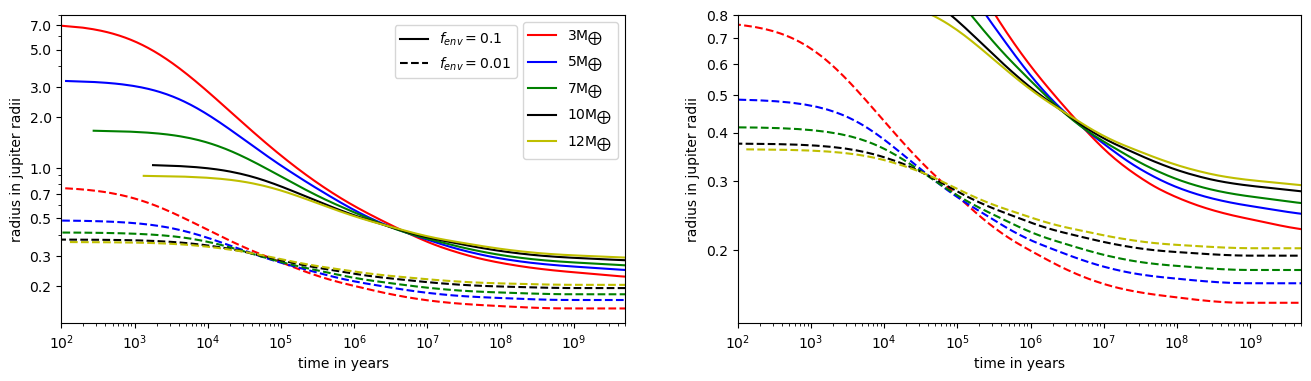

In [12]:
fig4, (ax1,ax2)=plt.subplots(1,2,figsize=[16,4])
ax1.plot(locals()['age_'+names[0]],locals()['r_'+names[0]],color='r',label=r'3M$_\bigoplus$')
ax1.plot(locals()['age_'+names[2]],locals()['r_'+names[2]],color='b',label=r'5M$_\bigoplus$')
ax1.plot(locals()['age_'+names[4]],locals()['r_'+names[4]],color='g',label=r'7M$_\bigoplus$')
ax1.plot(locals()['age_'+names[6]],locals()['r_'+names[6]],color='black',label=r'10M$_\bigoplus$')
ax1.plot(locals()['age_'+names[8]],locals()['r_'+names[8]],color='y',label=r'12M$_\bigoplus$')
ax1.plot(locals()['age_'+names[1]],locals()['r_'+names[1]],color='r',linestyle='--')
ax1.plot(locals()['age_'+names[3]],locals()['r_'+names[3]],color='b',linestyle='--')
ax1.plot(locals()['age_'+names[5]],locals()['r_'+names[5]],color='g',linestyle='--')
ax1.plot(locals()['age_'+names[7]],locals()['r_'+names[7]],color='black',linestyle='--')
ax1.plot(locals()['age_'+names[9]],locals()['r_'+names[9]],color='y',linestyle='--')
ax1.set_xlabel('time in years')
ax1.set_ylabel('radius in jupiter radii')
ax1.set_ylim(.12,8)
ax1.set_xlim(1e2,5e9)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_yticks([.2,.3,.5,.7,1,2,3,5,7])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.legend()

ax2.plot(locals()['age_'+names[0]],locals()['r_'+names[0]],color='r')
ax2.plot(locals()['age_'+names[2]],locals()['r_'+names[2]],color='b')
ax2.plot(locals()['age_'+names[4]],locals()['r_'+names[4]],color='g')
ax2.plot(locals()['age_'+names[6]],locals()['r_'+names[6]],color='black',label=r'$f_{env}=0.1$')
ax2.plot(locals()['age_'+names[8]],locals()['r_'+names[8]],color='y')
ax2.plot(locals()['age_'+names[1]],locals()['r_'+names[1]],color='r',linestyle='--')
ax2.plot(locals()['age_'+names[3]],locals()['r_'+names[3]],color='b',linestyle='--')
ax2.plot(locals()['age_'+names[5]],locals()['r_'+names[5]],color='g',linestyle='--')
ax2.plot(locals()['age_'+names[7]],locals()['r_'+names[7]],color='black',linestyle='--',label=r'$f_{env}=0.01$')
ax2.plot(locals()['age_'+names[9]],locals()['r_'+names[9]],color='y',linestyle='--')
ax2.set_ylim(.13,.8)
ax2.set_xlabel('time in years')
ax2.set_ylabel('radius in jupiter radii')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1e2,5e9)
ax2.set_yticks([.2,.3,.4,.5,.6,.7,.8])
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.legend(loc='best',bbox_to_anchor=(-0.38, .99))

plt.savefig('results/M-t_2.pdf')
plt.show()


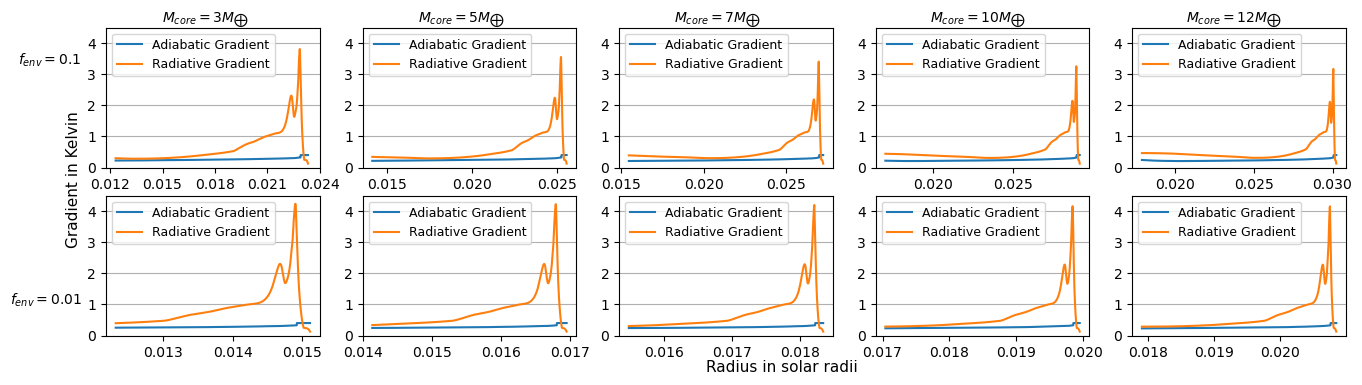

In [13]:
fig5, ax = plt.subplots(2,5,figsize=[16,4])

for i in range(len(prfl_names)):
    flag1=i%2
    flag2=i//2
    axis=ax[flag1,flag2]
    axis.plot(locals()[prfl_names[i]].R,locals()[prfl_names[i]].grada,label=r'Adiabatic Gradient')
    axis.plot(locals()[prfl_names[i]].R,locals()[prfl_names[i]].gradr,label=r'Radiative Gradient')
    if i==0:
        axis.set_xticks([0.012,0.015,0.018,0.021,0.024])
    axis.set_ylim(0,4.5)
    axis.set_yticks([0,1,2,3,4])
    axis.grid(axis='y')
    axis.legend(fontsize=9)

fig5.text(0.1, 0.5, r'Gradient in Kelvin', va='center', rotation='vertical',size='11')
fig5.text(0.07, 0.8, r'$f_{env}=0.1$', va='center', size='10')
fig5.text(0.065, 0.2, r'$f_{env}=0.01$', va='center', size='10')
fig5.text(0.5, 0.03, r'Radius in solar radii', va='center',size='11')
fig5.text(0.16, .90, r'$M_{core}=3M_\bigoplus$', va='center',size='10')
fig5.text(0.32, .90, r'$M_{core}=5M_\bigoplus$', va='center',size='10')
fig5.text(0.48, .90, r'$M_{core}=7M_\bigoplus$', va='center',size='10')
fig5.text(0.64, .90, r'$M_{core}=10M_\bigoplus$', va='center',size='10')
fig5.text(0.80, .90, r'$M_{core}=12M_\bigoplus$', va='center',size='10')


plt.savefig('results/gradients.pdf')
plt.show()



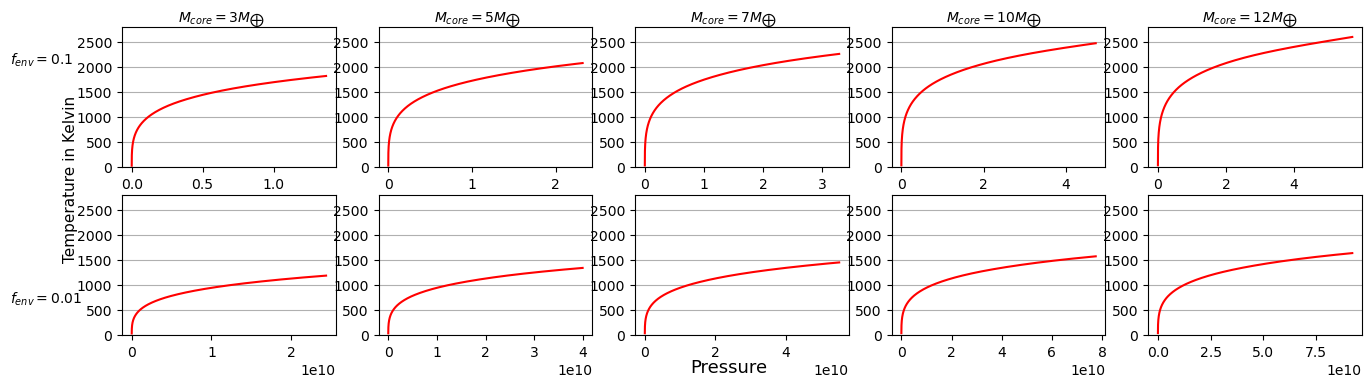

In [14]:
fig5, ax = plt.subplots(2,5,figsize=[16,4])

for i in range(len(prfl_names)):
    flag1=i%2
    flag2=i//2
    axis=ax[flag1,flag2]
    axis.plot(locals()[prfl_names[i]].pressure,locals()[prfl_names[i]].T,color='r')
    #axis.plot(locals()[prfl_names[i]].R,locals()[prfl_names[i]].gradr,label=r'Radiative Gradient')
    #if i==0:
    #   axis.set_xticks([0.012,0.015,0.018,0.021,0.024])
    axis.set_ylim(0,2800)
    axis.set_yticks([0,500,1000,1500,2000,2500])
    axis.grid(axis='y')

fig5.text(0.088, 0.5, r'Temperature in Kelvin', va='center', rotation='vertical',size='11')
fig5.text(0.055, 0.8, r'$f_{env}=0.1$', va='center', size='10')
fig5.text(0.055, 0.2, r'$f_{env}=0.01$', va='center', size='10')
fig5.text(0.48, 0.03, r'Pressure', va='center',size='13')
fig5.text(0.16, .90, r'$M_{core}=3M_\bigoplus$', va='center',size='10')
fig5.text(0.32, .90, r'$M_{core}=5M_\bigoplus$', va='center',size='10')
fig5.text(0.48, .90, r'$M_{core}=7M_\bigoplus$', va='center',size='10')
fig5.text(0.64, .90, r'$M_{core}=10M_\bigoplus$', va='center',size='10')
fig5.text(0.80, .90, r'$M_{core}=12M_\bigoplus$', va='center',size='10')


plt.savefig('results/T-P.pdf')
plt.show()



In [15]:
m12_0=mr.MesaData('LOGS/history_1e_evolve_12ME_0.1_9.0.data')
m12_10=mr.MesaData('LOGS/history_2c_surfheat_12ME_0.1_9.0_10x.data')
m12_100=mr.MesaData('LOGS/history_2c_surfheat_12ME_0.1_9.0_100x.data')

In [16]:
age_m12_0=m12_0.star_age
age_m12_10=m12_10.star_age
age_m12_100=m12_100.star_age

In [17]:
r_m12_0=m12_0.radius* RS_to_RJ 
r_m12_10=m12_10.radius* RS_to_RJ 
r_m12_100=m12_100.radius* RS_to_RJ 

In [18]:
m_m12_0=m12_0.star_mass* MS_to_MJ 
m_m12_10=m12_10.star_mass* MS_to_MJ
m_m12_100=m12_100.star_mass* MS_to_MJ

In [19]:
lum_m12_0=m12_0.luminosity
lum_m12_10=m12_10.luminosity
lum_m12_100=m12_100.luminosity

In [20]:
prfl_m12_0=mr.MesaData('LOGS/profile_12ME_0.1_9.0_14.data')
prfl_m12_10=mr.MesaData('LOGS/profile_12ME_0.1_9.0_10x_14.data')
prfl_m12_100=mr.MesaData('LOGS/profile_12ME_0.1_9.0_100x_14.data')

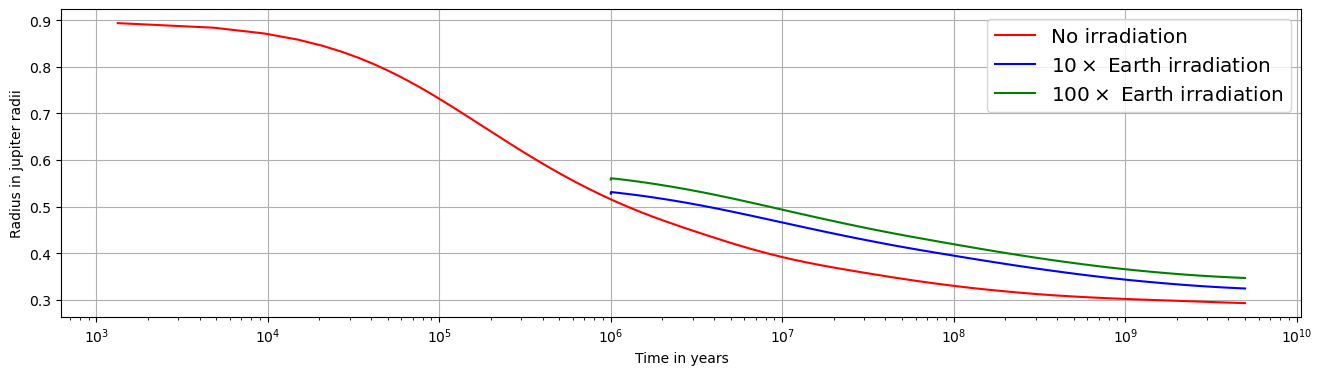

In [21]:
fig1, ax1=plt.subplots(1,1,figsize=[16,4])
ax1.plot(age_m12_0,r_m12_0,color='r',label=r'No irradiation')
ax1.plot(age_m12_10,r_m12_10,color='b',label=r'$10\times$ Earth irradiation')
ax1.plot(age_m12_100,r_m12_100,color='g',label=r'$100\times$ Earth irradiation')
ax1.set_xlabel('Time in years')
ax1.set_ylabel('Radius in jupiter radii')
#ax1.set_ylim(.25,.6)
#ax1.set_xlim(1e5,6e9)
ax1.set_xscale('log')
ax1.grid()
ax1.legend(fontsize='x-large')

plt.savefig('results/lab2_R-t.pdf')
plt.show()



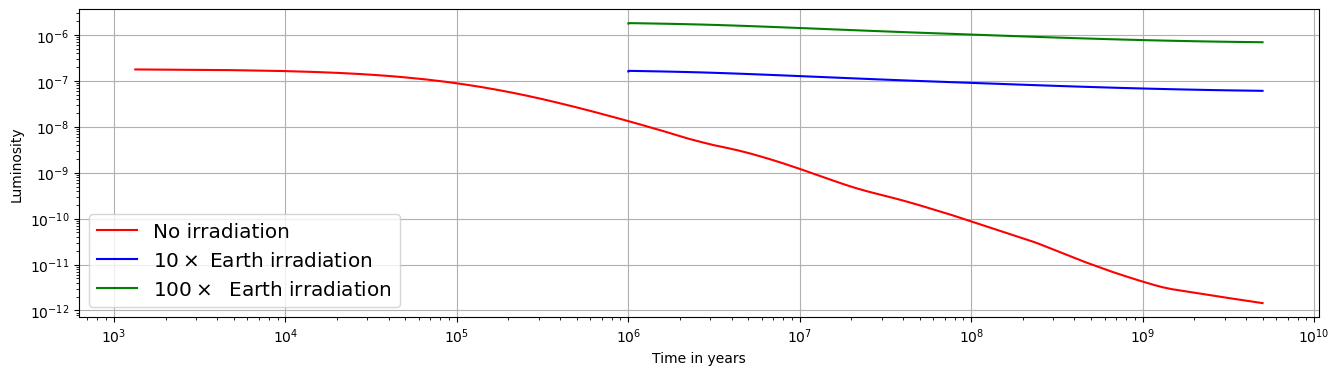

In [22]:
fig2, ax1=plt.subplots(1,1,figsize=[16,4])
ax1.plot(age_m12_0,lum_m12_0,color='r',label=r'No irradiation')
ax1.plot(age_m12_10,lum_m12_10,color='b',label=r'$10\times$ Earth irradiation')
ax1.plot(age_m12_100,lum_m12_100,color='g',label=r'$100\times$  Earth irradiation')
ax1.set_xlabel('Time in years')
ax1.set_ylabel('Luminosity')
ax1.set_yscale('log')
#ax1.set_ylim(.25,.6)
#ax1.set_xlim(1e6,6e9)
ax1.set_xscale('log')
ax1.grid()
ax1.legend(fontsize='x-large')

plt.savefig('results/lab2_L-t.pdf')
plt.show()



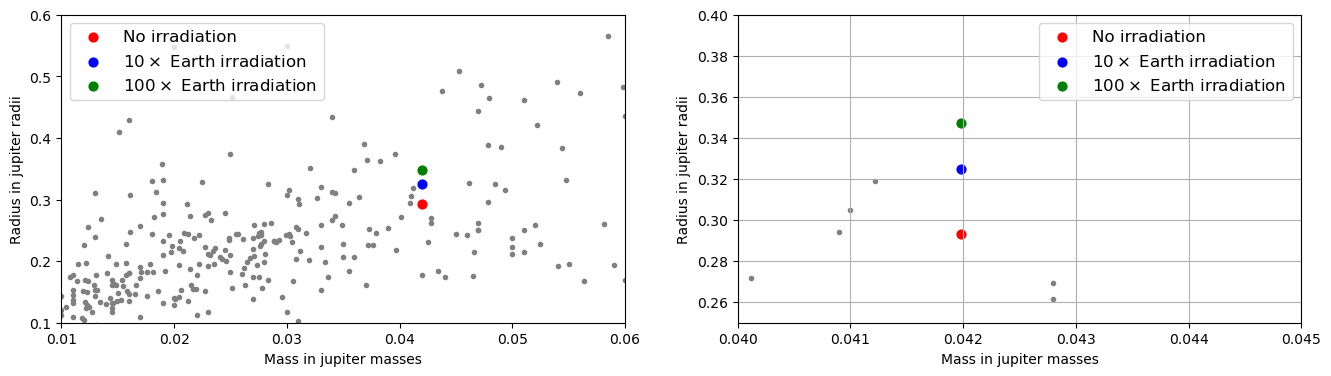

In [23]:
fig1, (ax1,ax2)=plt.subplots(1,2,figsize=[16,4])

ax1.set_xlabel('Mass in jupiter masses')
ax1.set_ylabel('Radius in jupiter radii')
ax1.scatter(M_R_name['mass'],M_R_name['radius'], color='gray', marker='.')




ax1.scatter(m_m12_0[-1],r_m12_0[-1],color='r',s=40,label=r'No irradiation')
ax1.scatter(m_m12_10[-1],r_m12_10[-1],color='b',s=40,label=r'$10\times$ Earth irradiation')
ax1.scatter(m_m12_100[-1],r_m12_100[-1],color='g',s=40,label=r'$100\times$ Earth irradiation')
ax1.legend(fontsize='large')

ax1.set_xlim(.01,.06)
ax1.set_ylim(0.10,0.60)


ax2.set_xlabel('Mass in jupiter masses')
ax2.set_ylabel('Radius in jupiter radii')
ax2.scatter(M_R_name['mass'],M_R_name['radius'], color='gray', marker='.')




ax2.scatter(m_m12_0[-1],r_m12_0[-1],color='r',s=40,label=r'No irradiation')
ax2.scatter(m_m12_10[-1],r_m12_10[-1],color='b',s=40,label=r'$10\times$ Earth irradiation')
ax2.scatter(m_m12_100[-1],r_m12_100[-1],color='g',s=40,label=r'$100\times$ Earth irradiation')
ax2.legend(fontsize='large')

ax2.set_xlim(.04,.045)
ax2.set_ylim(0.25,0.40)
ax2.grid()

plt.savefig('results/lab2_M-R.pdf')
plt.show()



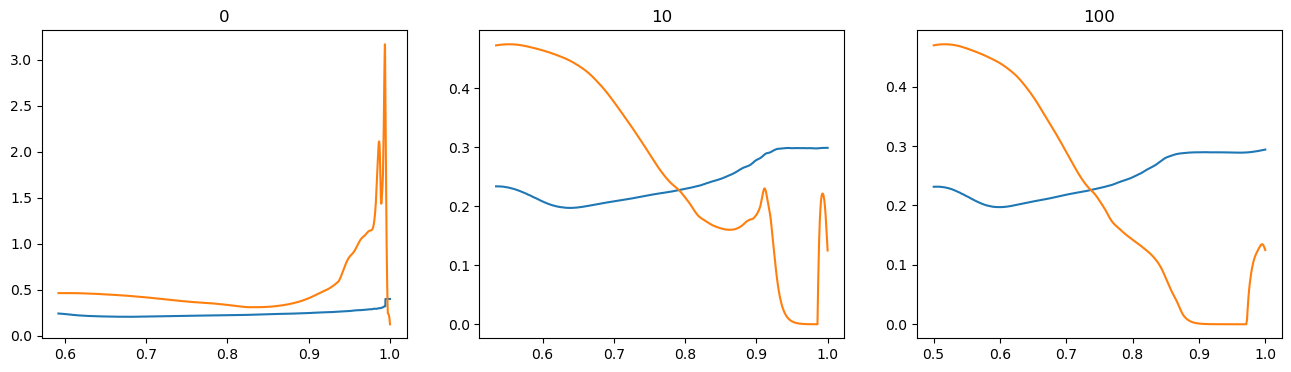

In [24]:
#extra figure not needed
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=[16,4])

ax1.plot(prfl_m12_0.R/prfl_m12_0.R[0],prfl_m12_0.grada,label=r'Adiabatic Gradient')
ax1.plot(prfl_m12_0.R/prfl_m12_0.R[0],prfl_m12_0.gradr,label=r'Radiative Gradient')
ax1.title.set_text('0')

ax2.plot(prfl_m12_10.R/prfl_m12_10.R[0],prfl_m12_10.grada,label=r'Adiabatic Gradient')
ax2.plot(prfl_m12_10.R/prfl_m12_10.R[0],prfl_m12_10.gradr,label=r'Radiative Gradient')
ax2.title.set_text('10')

ax3.plot(prfl_m12_100.R/prfl_m12_100.R[0],prfl_m12_100.grada,label=r'Adiabatic Gradient')
ax3.plot(prfl_m12_100.R/prfl_m12_100.R[0],prfl_m12_100.gradr,label=r'Radiative Gradient')
ax3.title.set_text('100')

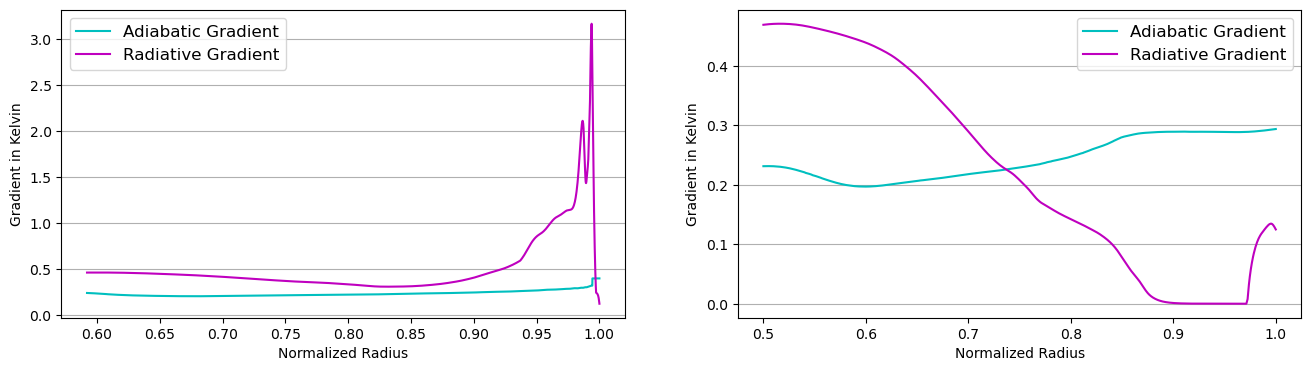

In [25]:
fig1, (ax1,ax2)=plt.subplots(1,2,figsize=[16,4])
ax1.plot(prfl_m12_0.R/prfl_m12_0.R[0],prfl_m12_0.grada,color='c',label=r'Adiabatic Gradient')
ax1.plot(prfl_m12_0.R/prfl_m12_0.R[0],prfl_m12_0.gradr,color='m',label=r'Radiative Gradient')
ax1.set_xlabel('Normalized Radius')
ax1.set_ylabel('Gradient in Kelvin')
ax1.grid(axis='y')
ax1.legend(fontsize='large')


ax2.plot(prfl_m12_100.R/prfl_m12_100.R[0],prfl_m12_100.grada,color='c',label=r'Adiabatic Gradient')
ax2.plot(prfl_m12_100.R/prfl_m12_100.R[0],prfl_m12_100.gradr,color='m',label=r'Radiative Gradient')
ax2.set_xlabel('Normalized Radius')
ax2.set_ylabel('Gradient in Kelvin')
ax2.grid(axis='y')
ax2.legend(fontsize='large')

plt.savefig('results/lab2_gradients.pdf')
plt.show()



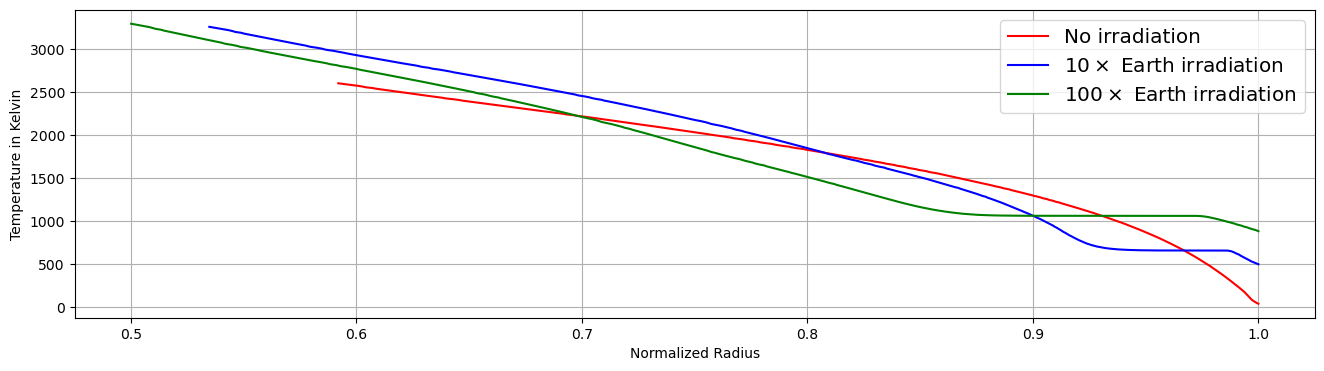

In [26]:
fig5, ax1 = plt.subplots(1,1,figsize=[16,4])

ax1.plot(prfl_m12_0.R/prfl_m12_0.R[0],prfl_m12_0.T,color='r',label=r'No irradiation')
ax1.plot(prfl_m12_10.R/prfl_m12_10.R[0],prfl_m12_10.T,color='b',label=r'$10\times$ Earth irradiation')
ax1.plot(prfl_m12_100.R/prfl_m12_100.R[0],prfl_m12_100.T,color='g',label=r'$100\times$ Earth irradiation')
ax1.set_xlabel('Normalized Radius')
ax1.set_ylabel('Temperature in Kelvin')
ax1.legend(fontsize='x-large')
ax1.grid()
plt.savefig('results/lab2_T-R.pdf')
plt.show()


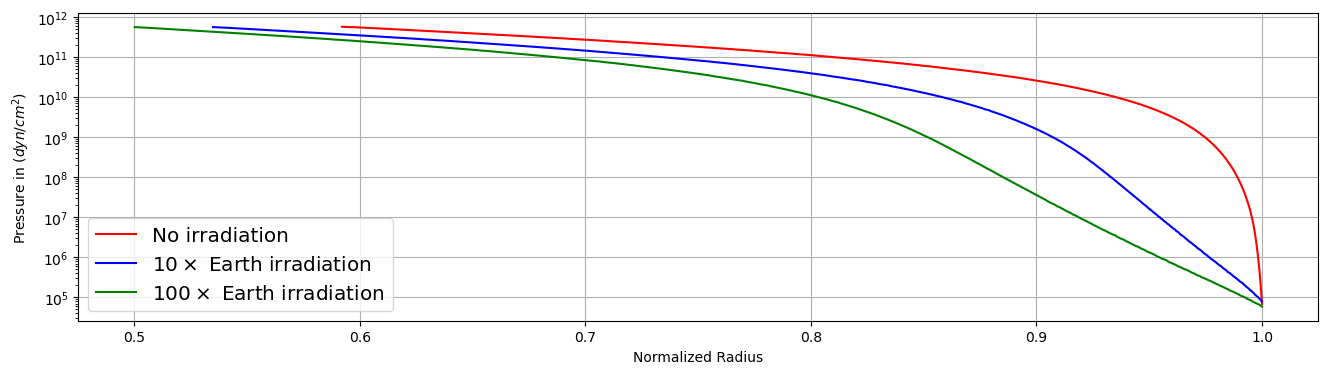

In [27]:
fig6, ax1 = plt.subplots(1,1,figsize=[16,4])

ax1.plot(prfl_m12_0.R/prfl_m12_0.R[0],prfl_m12_0.pressure,color='r',label=r'No irradiation')
ax1.plot(prfl_m12_10.R/prfl_m12_10.R[0],prfl_m12_10.pressure,color='b',label=r'$10\times$ Earth irradiation')
ax1.plot(prfl_m12_100.R/prfl_m12_100.R[0],prfl_m12_100.pressure,color='g',label=r'$100\times$ Earth irradiation')
ax1.set_yscale('log')
ax1.set_xlabel('Normalized Radius')
ax1.set_ylabel('Pressure in $(dyn/cm^2)$')
ax1.legend(fontsize='x-large')
ax1.grid()
plt.savefig('results/lab2_P-R.pdf')
plt.show()


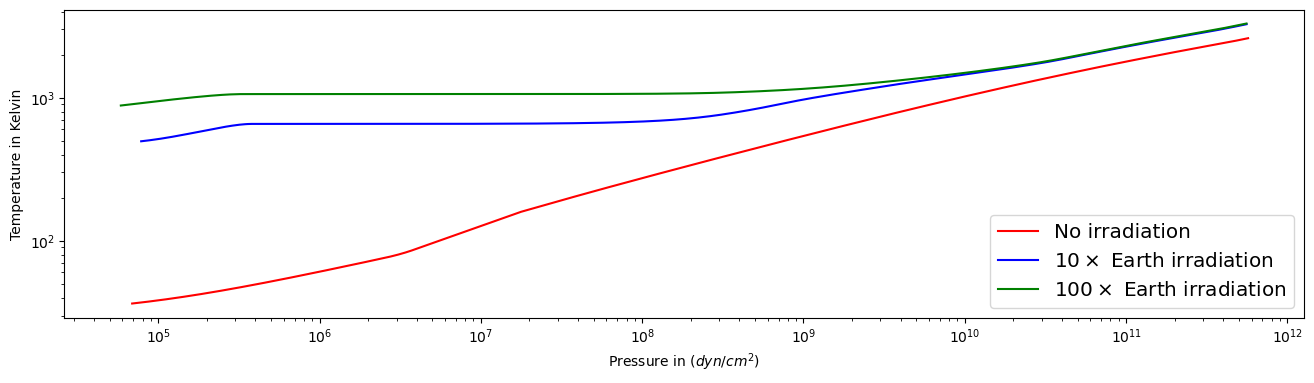

In [28]:
#extra plot not needed

fig, ax1 = plt.subplots(1,1,figsize=[16,4])

ax1.plot(prfl_m12_0.pressure,prfl_m12_0.T,color='r',label=r'No irradiation')
ax1.plot(prfl_m12_10.pressure,prfl_m12_10.T,color='b',label=r'$10\times$ Earth irradiation')
ax1.plot(prfl_m12_100.pressure,prfl_m12_100.T,color='g',label=r'$100\times$ Earth irradiation')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Temperature in Kelvin')
ax1.set_xlabel('Pressure in $(dyn/cm^2)$')
ax1.legend(fontsize='x-large')
plt.show()


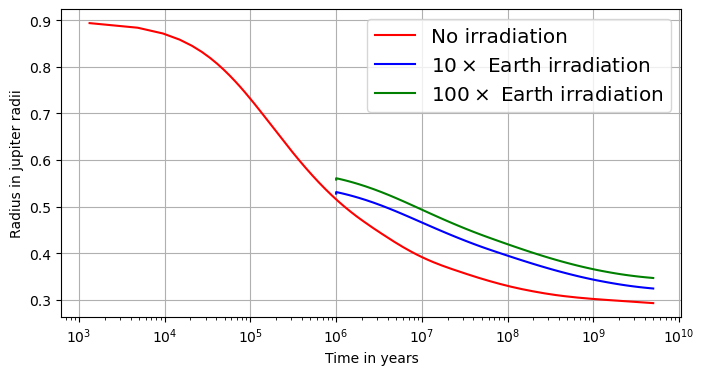

In [29]:
fig1_1, ax1=plt.subplots(1,1,figsize=[8,4])
ax1.plot(age_m12_0,r_m12_0,color='r',label=r'No irradiation')
ax1.plot(age_m12_10,r_m12_10,color='b',label=r'$10\times$ Earth irradiation')
ax1.plot(age_m12_100,r_m12_100,color='g',label=r'$100\times$ Earth irradiation')
ax1.set_xlabel('Time in years')
ax1.set_ylabel('Radius in jupiter radii')
#ax1.set_ylim(.25,.6)
#ax1.set_xlim(1e5,6e9)
ax1.set_xscale('log')
ax1.grid()
ax1.legend(fontsize='x-large')

plt.savefig('results/lab2_R-t_2.pdf')
plt.show()



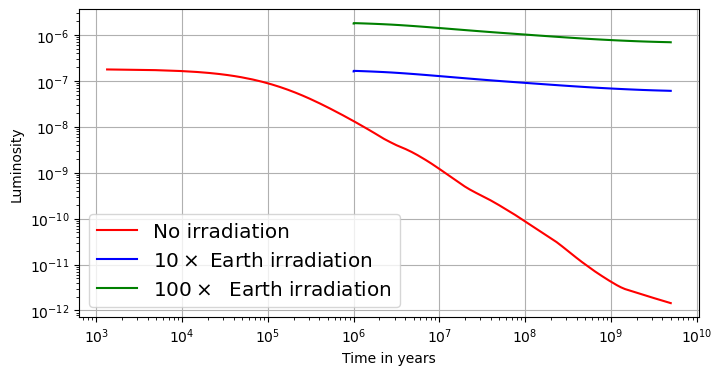

In [30]:
fig2_2, ax1=plt.subplots(1,1,figsize=[8,4])
ax1.plot(age_m12_0,lum_m12_0,color='r',label=r'No irradiation')
ax1.plot(age_m12_10,lum_m12_10,color='b',label=r'$10\times$ Earth irradiation')
ax1.plot(age_m12_100,lum_m12_100,color='g',label=r'$100\times$  Earth irradiation')
ax1.set_xlabel('Time in years')
ax1.set_ylabel('Luminosity')
ax1.set_yscale('log')
#ax1.set_ylim(.25,.6)
#ax1.set_xlim(1e6,6e9)
ax1.set_xscale('log')
ax1.grid()
ax1.legend(fontsize='x-large')

plt.savefig('results/lab2_L-t_2.pdf')
plt.show()



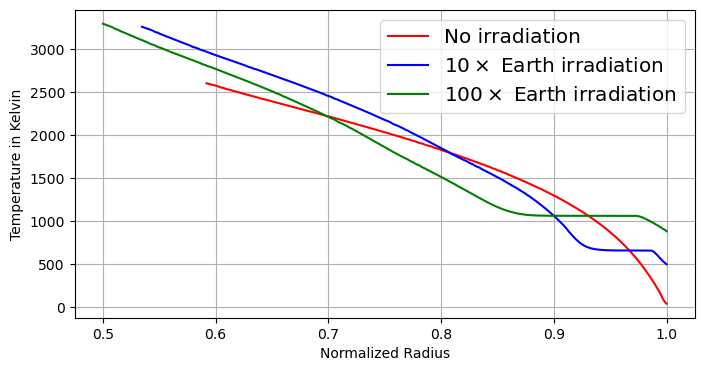

In [31]:
fig5_1, ax1 = plt.subplots(1,1,figsize=[8,4])

ax1.plot(prfl_m12_0.R/prfl_m12_0.R[0],prfl_m12_0.T,color='r',label=r'No irradiation')
ax1.plot(prfl_m12_10.R/prfl_m12_10.R[0],prfl_m12_10.T,color='b',label=r'$10\times$ Earth irradiation')
ax1.plot(prfl_m12_100.R/prfl_m12_100.R[0],prfl_m12_100.T,color='g',label=r'$100\times$ Earth irradiation')
ax1.set_xlabel('Normalized Radius')
ax1.set_ylabel('Temperature in Kelvin')
ax1.legend(fontsize='x-large')
ax1.grid()
plt.savefig('results/lab2_T-R_2.pdf')
plt.show()


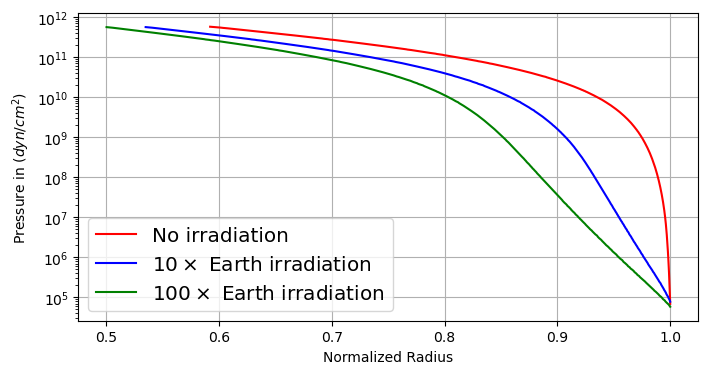

In [32]:
fig6_1, ax1 = plt.subplots(1,1,figsize=[8,4])

ax1.plot(prfl_m12_0.R/prfl_m12_0.R[0],prfl_m12_0.pressure,color='r',label=r'No irradiation')
ax1.plot(prfl_m12_10.R/prfl_m12_10.R[0],prfl_m12_10.pressure,color='b',label=r'$10\times$ Earth irradiation')
ax1.plot(prfl_m12_100.R/prfl_m12_100.R[0],prfl_m12_100.pressure,color='g',label=r'$100\times$ Earth irradiation')
ax1.set_yscale('log')
ax1.set_xlabel('Normalized Radius')
ax1.set_ylabel('Pressure in $(dyn/cm^2)$')
ax1.legend(fontsize='x-large')
ax1.grid()
plt.savefig('results/lab2_P-R_2.pdf')
plt.show()
